In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas
import geoplot
import plotly_express as px
import calendar
import dataframe_image as dfi

import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

SEED = 456
#TEST = 0.2
PATH = ""

In [2]:
X_train = pd.read_csv(PATH + "Data/X_train_restaurants.csv", index_col = [0])
y_train = pd.read_csv(PATH + "Data/y_train_restaurants.csv", index_col = [0])

/var/folders/3r/2gdxtbds6szcszj9bg_tdb_h0000gn/T/ipykernel_98301/4200436329.py:20: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


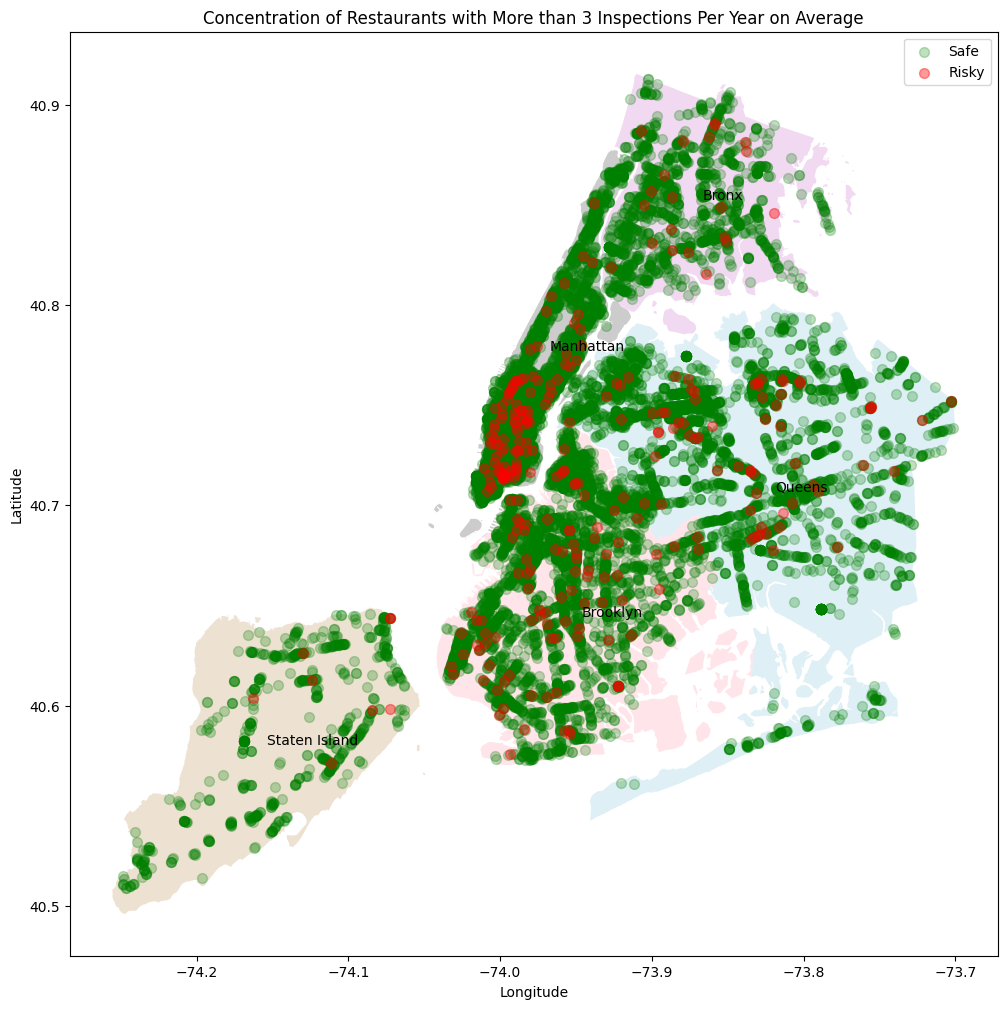

In [3]:
# map of risk by borough

crs = {'init':'epsg:4326'}

boroughs = geopandas.read_file(geoplot.datasets.get_path("nyc_boroughs"))

X_train["RISKY BUSINESS"] = y_train

geo_df = geopandas.GeoDataFrame(X_train, crs = crs, geometry = geopandas.points_from_xy(X_train["Longitude"], 
                                                                                        X_train["Latitude"]))

fig, ax = plt.subplots(figsize = (12, 12))
boroughs.plot(ax = ax, alpha = 0.4, color = ["tan", "lightblue", "pink", "grey", "plum"], label = boroughs.BoroName)
boroughs.apply(lambda x: ax.annotate(text = x["BoroName"], xy = x.geometry.centroid.coords[0]), axis = 1)
geo_df[geo_df["RISKY BUSINESS"] == 0].plot(ax = ax, markersize = 50, alpha = 0.25, color = "green", label = "Safe")
geo_df[geo_df["RISKY BUSINESS"] != 0].plot(ax = ax, markersize = 50, alpha = 0.4, color = "red", label = "Risky")
plt.title("Concentration of Restaurants with More than 3 Inspections Per Year on Average")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.legend()
plt.savefig(PATH + "Results/risk map.png")
plt.show()

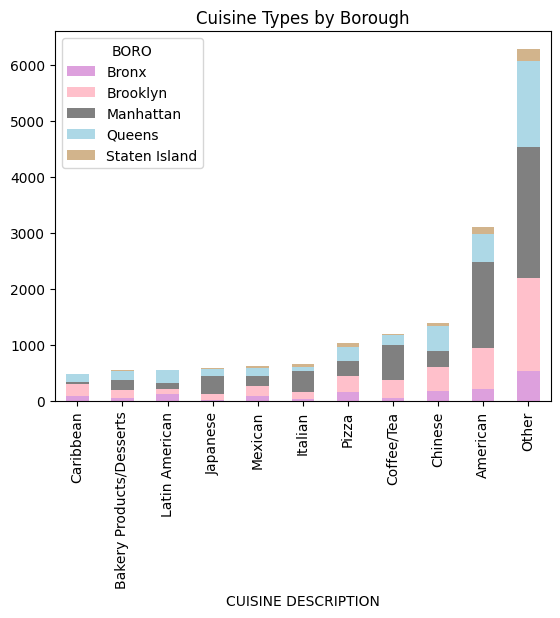

In [4]:
sorted_cuisines = pd.crosstab(X_train["CUISINE DESCRIPTION"], X_train["BORO"])
sorted_cuisines["Sum"] = sorted_cuisines.sum(axis = 1)
sorted_cuisines = sorted_cuisines.sort_values(by = "Sum")
sorted_cuisines = sorted_cuisines.drop("Sum", axis = 1)
sorted_cuisines.plot(kind = "bar", stacked = True, color = ["plum", "pink", "grey", "lightblue", "tan"])
plt.title("Cuisine Types by Borough")
plt.savefig(PATH + "Results/borough cuisines.png")
plt.show()

In [5]:
inspections_overtime = pd.crosstab(X_train["MONTHS OPERATING"], X_train["TOTAL INSPECTIONS"])

def highlight(val, df = X_train):
    lim = np.ceil(df.shape[0] * 0.05)
    sig = lim / 5
    if val >= lim:
        return "background-color: blue"
    elif val >= sig:
        return "color: blue"
    
inspections_overtime = inspections_overtime.style.applymap(highlight)
inspections_overtime

dfi.export(inspections_overtime, PATH + "Results/inspection table.png")

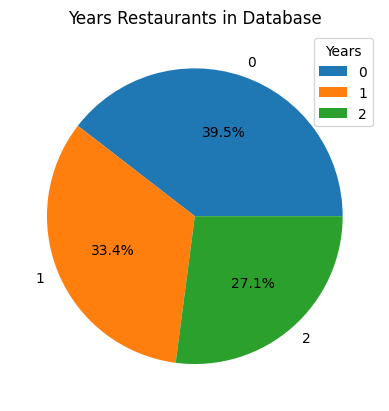

In [6]:
X_train["YEARS"] = X_train["MONTHS OPERATING"]//12

plt.pie(X_train["YEARS"].value_counts().values, labels = X_train["YEARS"].value_counts().index, autopct= '%.1f%%')
plt.legend(title = "Years")
plt.title("Years Restaurants in Database")
#plt.savefig(PATH + "Results/years in data.png")
plt.show()